In [2]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
import os
os.chdir("/gdrive/My Drive/colab_derinOgrenme/")

In [5]:
ls

 CNN.py               'modeller ve katmanlar.ipynb'
 colab_ML.ipynb        rakam_tanıma.ipynb
 fashion_mnist.ipynb   vektör-matris-tensör.ipynb
 MNIST_YSA.ipynb       VGG16_nesneTanima.ipynb


In [6]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions


In [7]:
model=VGG16(weights="imagenet",include_top=True)

553467904/553467096 [==============================] - 5s 0us/step


In [8]:
layers=dict([(layer.name,layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(None, 28, 28,

In [9]:
model.count_params()  #toplam parametre sayısı

138357544

In [32]:
import os
os.chdir("/gdrive/My Drive/colab_derinOgrenme/resim")

In [33]:
ls

buldog.jfif   f16.jfif  kedi.jpg           siyam.jpg
dakhund.jfif  f35.jpg   scottish-fold.jpg  yakup.JPG


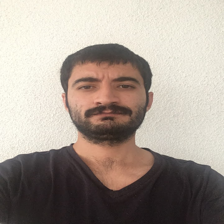

In [37]:
image_path="yakup.JPG"
image=Image.open(image_path)
image=image.resize((224,224))
image

In [38]:
x=np.array(image,dtype="float32")  #görüntüyü dizine çevirir
x=np.expand_dims(x,axis=0)  #diziyi listeye çavirir
x=preprocess_input(x)

In [39]:
preds=model.predict(x)
print("tahminler: ",decode_predictions(preds,top=3)[0])
print("en iyi tahmin: ",decode_predictions(preds,top=1)[0][0][1])

tahminler:  [('n03595614', 'jersey', 0.05110755), ('n03481172', 'hammer', 0.03039817), ('n03141823', 'crutch', 0.027016649)]
en iyi tahmin:  jersey
